In [8]:
import pandas as pd

In [9]:
import seaborn
import matplotlib.pyplot as plt

In [10]:
user_node = pd.read_csv('User_node_gender_updated.csv')

In [11]:
len(user_node)

1481

In [12]:
user_node = user_node[user_node['number_slugs'].notnull()]

In [13]:
len(user_node)

1480

Check degree by gender

In [14]:
degree = pd.read_csv('gephi output node centrality.csv')

In [15]:
# Weighted degree

In [16]:
user_node = user_node[user_node['number_commits'].notnull()]

In [17]:
user_node['login'].nunique()

1480

In [18]:
degree['Id'].nunique()

1481

In [19]:
node_degree = user_node.merge(degree, left_on='login', right_on='Id')

In [20]:
node_degree['login'].nunique()

1480

In [25]:
node_degree[node_degree['Weighted Degree'] == 0].groupby('gender_updated')['login'].nunique().reset_index().sort_values('login', ascending=False)

,gender_updated,login
1,male,735
3,unknown,144
0,female,129
2,other,35


Check those with 0 degrees by gender

In [27]:
degree_gender = node_degree[node_degree['Weighted Degree'] == 0].groupby('gender_updated')['login'].nunique().reset_index().sort_values('login', ascending=False)

In [28]:
degree_total = node_degree.groupby('gender_updated')['login'].nunique().reset_index().sort_values('login', ascending=False).rename(columns={'login':'total'})

In [29]:
degree_gender = degree_gender.merge(degree_total, on='gender_updated')

In [30]:
degree_gender['percentage'] = ((degree_gender['login'] / degree_gender['total'])*100).round(2)

In [32]:
degree_gender = degree_gender.rename(columns={'gender_updated':'gender', 'login':'zero_connections_count'})

In [33]:
degree_gender

,gender,zero_connections_count,total,percentage
0,male,735,1086,67.68
1,unknown,144,170,84.71
2,female,129,185,69.73
3,other,35,39,89.74


Slightly higher percentage of women (69.73%) has 0 connections than men (67.68%).

Check the total by gender

In [39]:
node_degree = node_degree.rename(columns={'gender_updated':'gender'})

In [41]:
node_degree.groupby('gender')['Weighted Degree'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,185.0,3.243243,13.232875,0.0,0.0,0.0,1.0,113.0
male,1086.0,7.345304,49.265120,0.0,0.0,0.0,1.0,1066.0
other,39.0,0.512821,2.722922,0.0,0.0,0.0,0.0,17.0
unknown,170.0,2.758824,12.734223,0.0,0.0,0.0,0.0,110.0


<AxesSubplot:xlabel='gender', ylabel='Weighted Degree'>

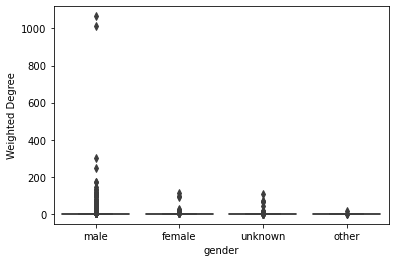

In [42]:
plt.ticklabel_format(style='plain', axis='x')
seaborn.boxplot(x='gender', y='Weighted Degree', 
            data=node_degree)

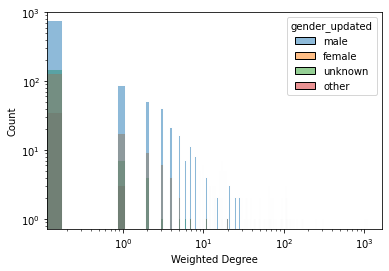

In [37]:
ax = seaborn.histplot(x='Weighted Degree',data=node_degree,hue='gender_updated')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

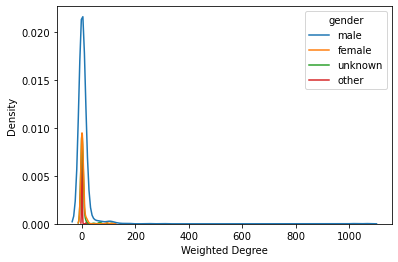

In [45]:
seaborn.kdeplot(x='Weighted Degree',data=node_degree,hue='gender')
plt.show()